## Exploring Processed data and building and testing models
The purpose of this notebook is to analyze Mid Day Meal processed data sets. This was done after data cleaning and feature engineering.

Further, the testing of best machine learning model will be done here. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [122]:
students = pd.read_csv("students_processed.csv")
attendance = pd.read_csv("attendance_processed.csv")
schools = pd.read_csv("schools_processed.csv")
hygiene = pd.read_csv("hygiene_processed.csv")
meals = pd.read_csv("meals_processed.csv")

In [3]:
students.head()

,student_id,school_id,student_name,grade,age,gender,height_cm,weight_kg,parent_occupation,family_income,...,academic_performance,transport_mode,BMI,income_per_sibling,gender_encoded,academic_performance_High,academic_performance_Low,academic_performance_Medium,parent_occupation_encoded,transport_mode_encoded
0,1,1,Student_1,2,7,Female,120.0,16.7,Farmer,31742.3,...,Low,Bus,11.597222,31742.300000,0,False,True,False,1,1
1,2,1,Student_2,5,11,Female,148.9,24.7,Unemployed,48735.4,...,High,Walk,11.140574,16245.133333,0,True,False,False,4,2
2,3,1,Student_3,1,7,Male,116.5,15.7,Teacher,57871.9,...,Medium,Bicycle,11.567721,14467.975000,1,False,False,True,3,0
3,4,1,Student_4,3,8,Female,129.5,18.8,Teacher,82191.4,...,Low,Bus,11.210328,41095.700000,0,False,True,False,3,1
4,5,1,Student_5,2,7,Female,120.5,17.3,Unemployed,39635.8,...,Medium,Bicycle,11.914395,9908.950000,0,False,False,True,4,0


In [4]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   student_id                   180 non-null    int64  
 1   school_id                    180 non-null    int64  
 2   student_name                 180 non-null    object 
 3   grade                        180 non-null    int64  
 4   age                          180 non-null    int64  
 5   gender                       180 non-null    object 
 6   height_cm                    180 non-null    float64
 7   weight_kg                    180 non-null    float64
 8   parent_occupation            180 non-null    object 
 9   family_income                180 non-null    float64
 10  number_of_siblings           180 non-null    int64  
 11  academic_performance         180 non-null    object 
 12  transport_mode               180 non-null    object 
 13  BMI                 

In [5]:
attendance.head()

,attendance_id,student_id,school_id,date,status,attendance_rate,week_of_year
0,1,1,1,2021-01-01,0,0.53,1
1,34975,135,3,2021-01-01,1,0.47,1
2,35236,136,3,2021-01-01,0,0.47,1
3,5221,21,1,2021-01-01,1,0.53,1
4,35497,137,3,2021-01-01,0,0.47,1


In [6]:
attendance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46980 entries, 0 to 46979
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   attendance_id    46980 non-null  int64  
 1   student_id       46980 non-null  int64  
 2   school_id        46980 non-null  int64  
 3   date             46980 non-null  object 
 4   status           46980 non-null  int64  
 5   attendance_rate  46980 non-null  float64
 6   week_of_year     46980 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 2.5+ MB


In [7]:
schools.head()

,school_id,school_name,location,max_students,contact_person
0,1,Green Valley School,Delhi,200,Mr. Ramesh Kumar
1,2,Blue Ridge Academy,Mumbai,180,Ms. Priya Sharma
2,3,Hilltop High,Bangalore,220,Dr. Sunita Rao


In [8]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school_id       3 non-null      int64 
 1   school_name     3 non-null      object
 2   location        3 non-null      object
 3   max_students    3 non-null      int64 
 4   contact_person  3 non-null      object
dtypes: int64(2), object(3)
memory usage: 252.0+ bytes


In [9]:
hygiene.head()

,audit_id,school_id,date,auditor_name,hygiene_score,remarks,remarks_encoded
0,1,1,2021-01-01,Auditor_1,7.83,No remarks,1
1,2,1,2021-01-15,Auditor_1,7.67,No remarks,1
2,3,1,2021-02-01,Auditor_1,6.35,Satisfactory,2
3,4,1,2021-02-15,Auditor_1,6.29,No remarks,1
4,5,1,2021-03-01,Auditor_1,9.45,Satisfactory,2


In [119]:
hygiene.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 63 entries, 2021-01-01 to 2021-12-31
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   audit_id         63 non-null     int64  
 1   school_id        63 non-null     int64  
 2   auditor_name     63 non-null     object 
 3   hygiene_score    63 non-null     float64
 4   remarks          63 non-null     object 
 5   remarks_encoded  63 non-null     int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 3.4+ KB


In [67]:
meals.head()

,meal_id,school_id,menu,date,meal_quality_score,remarks,preparation_time,cooking_temperature,serving_temperature,calories,...,weather_conditions,is_wastage_high,cooking_serving_diff,calories_per_meal,weather_conditions_encoded,menu_Chapati & Vegetables,menu_Idli & Sambar,menu_Khichdi,menu_Pulao,menu_Rice & Dal
0,1,1,Khichdi,2021-01-07,9.41,No Remarks,105,72.42,62.29,472.74,...,Cold,0,10.13,50.238045,0,False,False,True,False,False
1,2,1,Khichdi,2021-04-21,7.55,No Remarks,43,NaN,60.58,210.54,...,Warm,0,NaN,27.886093,3,False,False,True,False,False
2,3,1,Pulao,2021-05-21,6.01,No Remarks,66,68.81,68.63,494.11,...,Warm,0,0.18,82.214642,3,False,False,False,True,False
3,4,1,Pulao,2021-09-14,6.65,Poor,54,83.25,60.82,267.56,...,Rainy,0,22.43,40.234586,2,False,False,False,True,False
4,5,1,Khichdi,2021-02-17,6.63,Poor,40,82.69,69.21,271.65,...,Cold,0,13.48,40.972851,0,False,False,True,False,False


In [96]:
meals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   meal_id                     900 non-null    int64  
 1   school_id                   900 non-null    int64  
 2   menu                        900 non-null    object 
 3   date                        900 non-null    object 
 4   meal_quality_score          900 non-null    float64
 5   remarks                     900 non-null    object 
 6   preparation_time            900 non-null    int64  
 7   cooking_temperature         879 non-null    float64
 8   serving_temperature         900 non-null    float64
 9   calories                    900 non-null    float64
 10  meal_wastage                900 non-null    int64  
 11  weather_conditions          900 non-null    object 
 12  is_wastage_high             900 non-null    int64  
 13  cooking_serving_diff        879 non

### Module 1: Quality and Hygiene Prediction
#### Objective:
Predict if food quality and hygiene meet standards.

In [153]:
hygiene = pd.read_csv("hygiene_processed.csv")

In [154]:
hygiene

,audit_id,school_id,date,auditor_name,hygiene_score,remarks,remarks_encoded
0,1,1,2021-01-01,Auditor_1,7.83,Satisfactory,3
1,2,1,2021-01-03,Auditor_1,7.75,Satisfactory,3
2,3,1,2021-01-05,Auditor_1,7.67,Satisfactory,3
3,4,1,2021-01-06,Auditor_1,7.58,Satisfactory,3
4,5,1,2021-01-07,Auditor_1,7.50,Needs Improvement,2
...,...,...,...,...,...,...,...
602,894,3,2021-12-21,Auditor_3,8.27,Good,1
603,896,3,2021-12-23,Auditor_3,8.28,Good,1
604,898,3,2021-12-24,Auditor_3,8.29,Good,1
605,899,3,2021-12-26,Auditor_3,8.30,Good,1


#### Merge Datasets

In [189]:
# Merge on school_id and date
combined_data = pd.merge(meals, hygiene, on=['school_id', 'date'], how='inner')

In [169]:
combined_data

,meal_id,school_id,menu,date,meal_quality_score,remarks_x,preparation_time,cooking_temperature,serving_temperature,calories,...,menu_Chapati & Vegetables,menu_Idli & Sambar,menu_Khichdi,menu_Pulao,menu_Rice & Dal,audit_id,auditor_name,hygiene_score,remarks_y,remarks_encoded
0,1,1,Khichdi,2021-01-07,9.41,No Remarks,105,72.42,62.29,472.74,...,False,False,True,False,False,5,Auditor_1,7.50,Needs Improvement,2
1,2,1,Khichdi,2021-04-21,7.55,No Remarks,43,NaN,60.58,210.54,...,False,False,True,False,False,95,Auditor_1,6.79,Needs Improvement,2
2,120,1,Chapati & Vegetables,2021-04-21,6.85,Average,77,79.82,71.15,364.27,...,True,False,False,False,False,95,Auditor_1,6.79,Needs Improvement,2
3,261,1,Idli & Sambar,2021-04-21,9.13,Poor,51,67.34,71.40,423.51,...,False,True,False,False,False,95,Auditor_1,6.79,Needs Improvement,2
4,3,1,Pulao,2021-05-21,6.01,No Remarks,66,68.81,68.63,494.11,...,False,False,False,True,False,127,Auditor_1,7.86,Satisfactory,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,883,3,Rice & Dal,2021-10-24,7.91,Average,67,89.34,51.95,413.14,...,False,False,False,False,True,849,Auditor_3,9.15,Good,1
896,891,3,Pulao,2021-04-22,6.55,No Remarks,37,67.10,66.27,390.14,...,False,False,False,True,False,694,Auditor_3,8.10,Good,1
897,894,3,Chapati & Vegetables,2021-06-13,5.59,No Remarks,70,84.21,63.73,412.68,...,True,False,False,False,False,734,Auditor_3,9.14,Good,1
898,898,3,Khichdi,2021-01-23,7.55,No Remarks,46,NaN,66.16,446.45,...,False,False,True,False,False,618,Auditor_3,7.40,Needs Improvement,2


In [190]:
# Ensure no missing values remain in key features
combined_data.fillna(method='ffill', inplace=True)

# Define the target variable - this is the dependent variable
combined_data['target'] = (
    (combined_data['meal_quality_score'] >= 7.5) &
    (combined_data['hygiene_score'] >= 7.5)
).astype(int)

In [171]:
combined_data['target'].value_counts()

0    482
1    418
Name: target, dtype: int64

#### Train Test Split

In [191]:
from sklearn.model_selection import train_test_split

# Here, I will select input or independent features
X = combined_data[['cooking_temperature', 'serving_temperature', 'meal_quality_score',
                   'meal_wastage', 'calories_per_meal', 'cooking_serving_diff'
                   ]]
y = combined_data['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


#### Model Training

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=2)

# Perform stratified k-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='f1')
print(f"Average F1-Score from CV: {np.mean(cv_scores):.4f}")

# Train the model on the full training set
rf_model.fit(X_train, y_train)


Average F1-Score from CV: 0.8932


RandomForestClassifier(max_depth=10, random_state=42)

In [193]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.89      0.92        96
           1       0.88      0.96      0.92        84

    accuracy                           0.92       180
   macro avg       0.92      0.92      0.92       180
weighted avg       0.93      0.92      0.92       180

Confusion Matrix:
[[85 11]
 [ 3 81]]


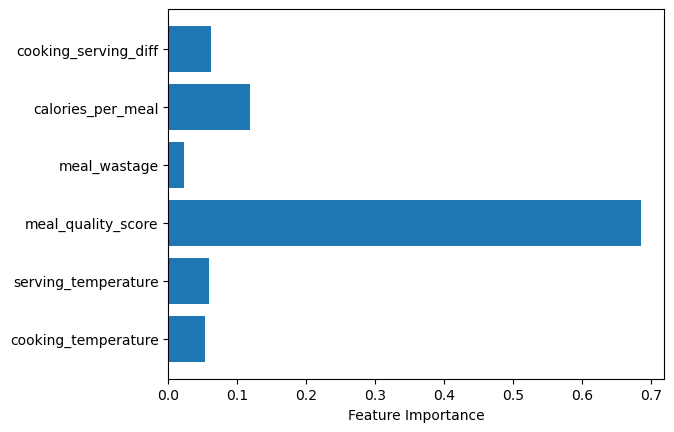

In [194]:
import matplotlib.pyplot as plt
feature_importances = rf_model.feature_importances_
plt.barh(X_train.columns, feature_importances)
plt.xlabel("Feature Importance")
plt.show()


In [166]:
y_test.value_counts()

0    96
1    84
Name: target, dtype: int64

In [188]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)


{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


### Module 2: Anomaly Detection for Attendance and Distribution

In [202]:
attendance

,attendance_id,student_id,school_id,date,status,attendance_rate,week_of_year
0,1,1,1,2021-01-01,0,0.53,1
1,34975,135,3,2021-01-01,1,0.47,1
2,35236,136,3,2021-01-01,0,0.47,1
3,5221,21,1,2021-01-01,1,0.53,1
4,35497,137,3,2021-01-01,0,0.47,1
...,...,...,...,...,...,...,...
46975,30276,116,2,2021-12-31,0,0.33,52
46976,30015,115,2,2021-12-31,0,0.33,52
46977,29754,114,2,2021-12-31,0,0.33,52
46978,34974,134,3,2021-12-31,0,0.52,52


In [203]:
meals

,meal_id,school_id,menu,date,meal_quality_score,remarks,preparation_time,cooking_temperature,serving_temperature,calories,...,weather_conditions,is_wastage_high,cooking_serving_diff,calories_per_meal,weather_conditions_encoded,menu_Chapati & Vegetables,menu_Idli & Sambar,menu_Khichdi,menu_Pulao,menu_Rice & Dal
0,1,1,Khichdi,2021-01-07,9.41,No Remarks,105,72.42,62.29,472.74,...,Cold,0,10.13,50.238045,0,False,False,True,False,False
1,2,1,Khichdi,2021-04-21,7.55,No Remarks,43,NaN,60.58,210.54,...,Warm,0,NaN,27.886093,3,False,False,True,False,False
2,3,1,Pulao,2021-05-21,6.01,No Remarks,66,68.81,68.63,494.11,...,Warm,0,0.18,82.214642,3,False,False,False,True,False
3,4,1,Pulao,2021-09-14,6.65,Poor,54,83.25,60.82,267.56,...,Rainy,0,22.43,40.234586,2,False,False,False,True,False
4,5,1,Khichdi,2021-02-17,6.63,Poor,40,82.69,69.21,271.65,...,Cold,0,13.48,40.972851,0,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,896,3,Idli & Sambar,2021-07-14,8.21,Average,45,79.24,53.75,228.19,...,Hot,0,25.49,27.794153,1,False,True,False,False,False
896,897,3,Pulao,2021-02-15,6.81,Average,66,82.92,66.04,360.83,...,Cold,0,16.88,52.985316,0,False,False,False,True,False
897,898,3,Khichdi,2021-01-23,7.55,No Remarks,46,NaN,66.16,446.45,...,Cold,0,NaN,59.132450,0,False,False,True,False,False
898,899,3,Khichdi,2021-02-12,6.97,Good,46,88.95,56.64,268.35,...,Cold,0,32.31,38.500717,0,False,False,True,False,False


In [242]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   student_id                   180 non-null    int64  
 1   school_id                    180 non-null    int64  
 2   student_name                 180 non-null    object 
 3   grade                        180 non-null    int64  
 4   age                          180 non-null    int64  
 5   gender                       180 non-null    object 
 6   height_cm                    180 non-null    float64
 7   weight_kg                    180 non-null    float64
 8   parent_occupation            180 non-null    object 
 9   family_income                180 non-null    float64
 10  number_of_siblings           180 non-null    int64  
 11  academic_performance         180 non-null    object 
 12  transport_mode               180 non-null    object 
 13  BMI                 

In [293]:
# # Merge datasets on school_id and date
# merged_data = pd.merge(attendance, meals, on=['school_id', 'date'], how='inner')
# merged_data = pd.merge(merged_data, students, on='student_id', how='inner')

# # Select relevant columns
# anomaly_data = merged_data[['attendance_rate', 'meal_wastage', 'cooking_serving_diff','family_income','weight_kg']]

# # Handle missing values if any
# anomaly_data.fillna(0, inplace=True)

In [230]:
anomaly_data

,attendance_rate,meal_wastage,cooking_serving_diff,parent_occupation,family_income,weight_kg
0,0.53,2,10.23,Farmer,31742.3,16.7
1,0.43,0,23.26,Farmer,31742.3,16.7
2,0.57,1,-0.74,Farmer,31742.3,16.7
3,0.52,4,10.13,Farmer,31742.3,16.7
4,0.45,1,15.04,Farmer,31742.3,16.7
...,...,...,...,...,...,...
38035,0.57,5,-6.04,Shopkeeper,56144.3,21.8
38036,0.52,5,14.77,Shopkeeper,56144.3,21.8
38037,0.52,1,9.81,Shopkeeper,56144.3,21.8
38038,0.40,0,-6.44,Shopkeeper,56144.3,21.8


In [291]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# # Standardize features for DBSCAN
# scaler = StandardScaler()
# anomaly_data_scaled = scaler.fit_transform(anomaly_data)
# anomaly_data_scaled += np.random.normal(0, 0.01, anomaly_data_scaled.shape)


# # Apply DBSCAN
# dbscan = DBSCAN(eps=3, min_samples=5)  # Adjust eps and min_samples for better sensitivity
# anomaly_labels = dbscan.fit_predict(anomaly_data_scaled)

# # Add anomaly labels to the dataset
# merged_data['anomaly_flag'] = anomaly_labels


In [292]:
# # Count unique clusters
# unique_labels = np.unique(anomaly_labels)
# print(f"Number of clusters (excluding noise): {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
# print(f"Number of anomalies (noise points): {sum(anomaly_labels == -1)}")

# # Add cluster labels to the data for analysis
# merged_data['cluster'] = anomaly_labels

# # Display cluster distribution
# cluster_counts = merged_data['cluster'].value_counts()
# print("Cluster Distribution:")
# print(cluster_counts)

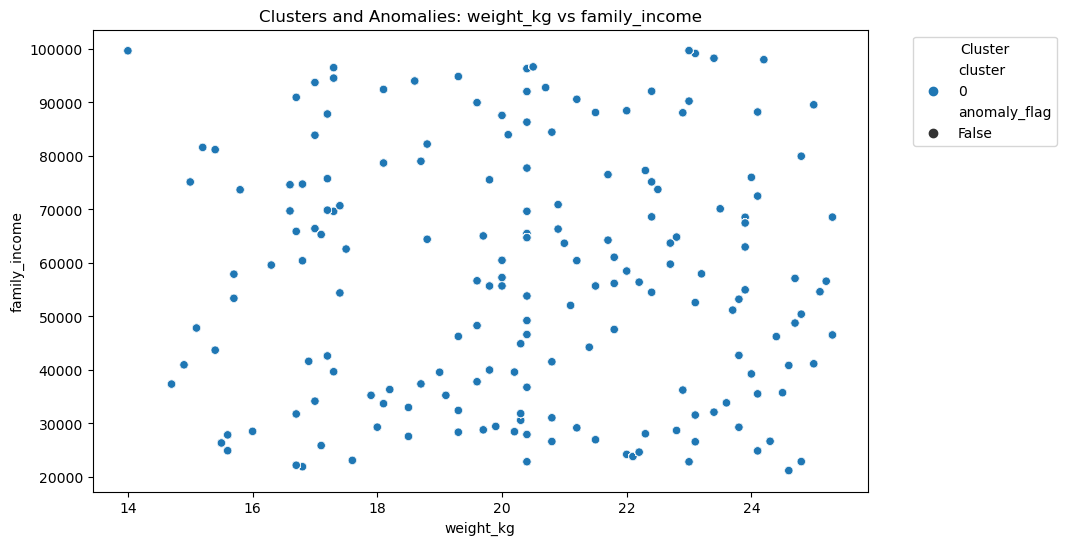

In [240]:
import seaborn as sns

# Select two principal features for visualization
feature_x = 'weight_kg'
feature_y = 'family_income'

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=merged_data[feature_x], 
    y=merged_data[feature_y], 
    hue=merged_data['cluster'], 
    palette='tab10', 
    style=merged_data['anomaly_flag'] == -1,  # Highlight anomalies with different marker
    markers={True: 'X', False: 'o'}
)
plt.title(f"Clusters and Anomalies: {feature_x} vs {feature_y}")
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

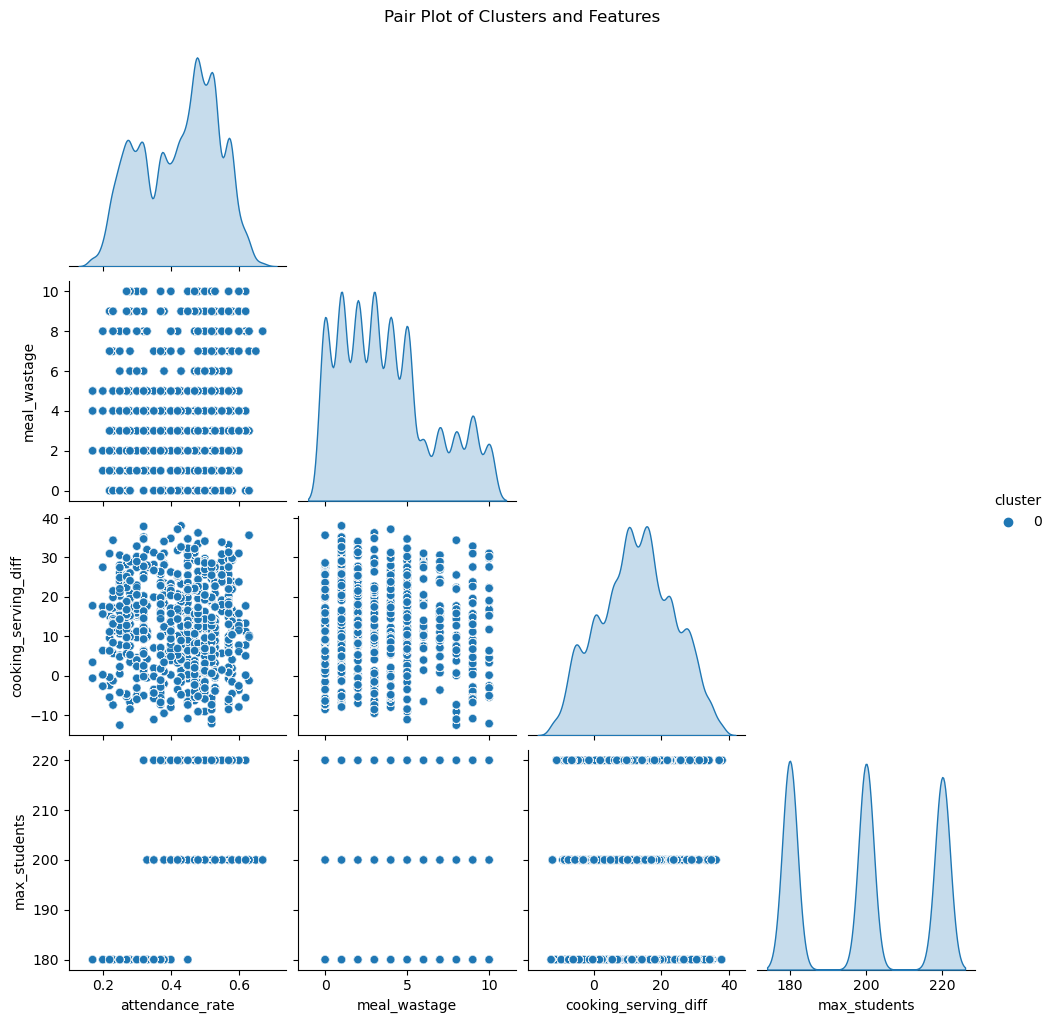

In [218]:
# Select features to visualize
plot_features = ['attendance_rate', 'meal_wastage', 'cooking_serving_diff', 'max_students']

# Create pairplot with clusters
sns.pairplot(
    merged_data, 
    vars=plot_features, 
    hue='cluster', 
    palette='tab10', 
    corner=True,
    plot_kws={'alpha': 0.7}
)
plt.suptitle("Pair Plot of Clusters and Features", y=1.02)
plt.show()

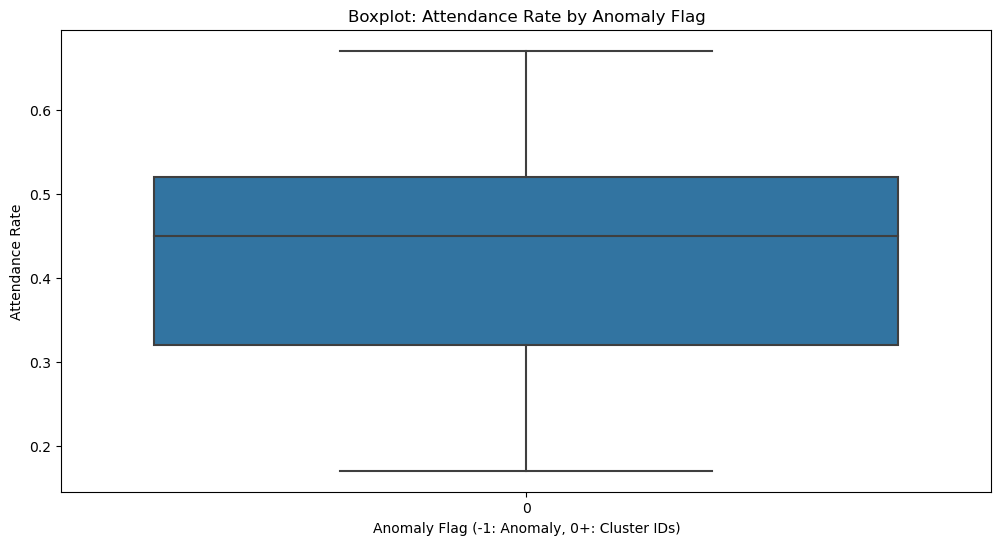

In [210]:
# Create boxplot to compare anomaly and normal points
plt.figure(figsize=(12, 6))
sns.boxplot(x='anomaly_flag', y='attendance_rate', data=merged_data)
plt.title("Boxplot: Attendance Rate by Anomaly Flag")
plt.xlabel("Anomaly Flag (-1: Anomaly, 0+: Cluster IDs)")
plt.ylabel("Attendance Rate")
plt.show()


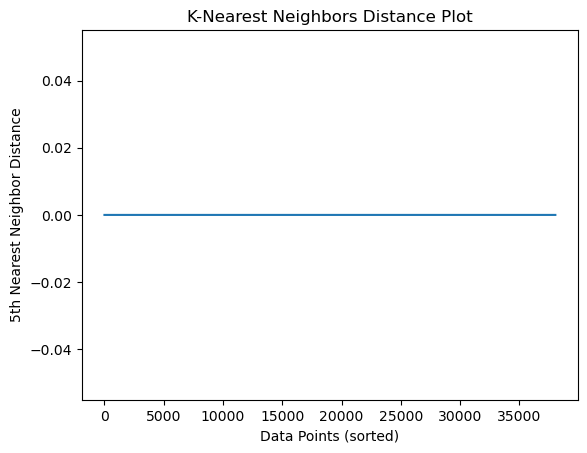

In [219]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Fit nearest neighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(anomaly_data_scaled)
distances, indices = neighbors_fit.kneighbors(anomaly_data_scaled)

# Sort distances to find the elbow point
distances = np.sort(distances[:, -1])  # Select the 5th nearest distance
plt.plot(distances)
plt.title("K-Nearest Neighbors Distance Plot")
plt.xlabel("Data Points (sorted)")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()


In [294]:
print(anomaly_data.describe())


       attendance_rate  meal_wastage  cooking_serving_diff  family_income  \
count     38040.000000  38040.000000          38040.000000   38040.000000   
mean          0.424196      3.723975             12.425931   56546.749274   
std           0.112444      2.835342             10.909272   22836.322488   
min           0.170000      0.000000            -12.560000   21160.300000   
25%           0.320000      1.000000              4.530000   35719.400000   
50%           0.450000      3.000000             12.470000   55671.000000   
75%           0.520000      5.000000             20.230000   74706.600000   
max           0.670000     10.000000             38.020000   99661.700000   

          weight_kg  
count  38040.000000  
mean      20.372219  
std        2.882181  
min       14.000000  
25%       17.900000  
50%       20.400000  
75%       22.800000  
max       25.300000  


In [341]:
# Aggregate students data
students_agg = students.groupby('school_id').agg({
    'BMI': 'mean',
    'family_income': 'mean',
    'academic_performance_High': 'sum'  # Count of high-performing students
}).rename(columns={
    'BMI': 'avg_BMI',
    'family_income': 'avg_family_income',
    'academic_performance_High': 'num_high_performers'
})

# Aggregate meals data
meals_agg = meals.groupby('school_id').agg({
    'calories_per_meal': 'mean',
    'meal_quality_score': 'mean'
}).rename(columns={
    'calories_per_meal': 'avg_calories_per_meal',
    'meal_quality_score': 'avg_meal_quality_score'
})

# Aggregate attendance data
attendance_agg = attendance.groupby('school_id').agg({
    'attendance_rate': 'mean'
}).rename(columns={
    'attendance_rate': 'avg_attendance_rate'
})


In [342]:
# Merge aggregated datasets
school_data = students_agg.merge(meals_agg, on='school_id').merge(attendance_agg, on='school_id')

# Add daily-level features (attendance + meals)
daily_data = pd.merge(attendance, meals, on=['school_id', 'date'], how='inner')

# Select relevant features for clustering
clustering_data = daily_data[['attendance_rate', 'meal_wastage', 'cooking_serving_diff', 'calories_per_meal','school_id']]
clustering_data = pd.merge(clustering_data, school_data, on='school_id')



In [343]:
mean_value = clustering_data['cooking_serving_diff'].mean()
clustering_data['cooking_serving_diff'] = clustering_data['cooking_serving_diff'].fillna(mean_value)


In [350]:
clustering_data.head(50)

,attendance_rate,meal_wastage,cooking_serving_diff,calories_per_meal,school_id,avg_BMI,avg_family_income,num_high_performers,avg_calories_per_meal,avg_meal_quality_score,avg_attendance_rate
0,0.53,2,10.23,54.093846,1,11.59938,59067.185,16,46.579526,7.688933,0.495862
1,0.53,2,10.23,54.093846,1,11.59938,59067.185,16,46.579526,7.688933,0.495862
2,0.53,2,10.23,54.093846,1,11.59938,59067.185,16,46.579526,7.688933,0.495862
3,0.53,2,10.23,54.093846,1,11.59938,59067.185,16,46.579526,7.688933,0.495862
4,0.53,2,10.23,54.093846,1,11.59938,59067.185,16,46.579526,7.688933,0.495862
5,0.53,2,10.23,54.093846,1,11.59938,59067.185,16,46.579526,7.688933,0.495862
6,0.53,2,10.23,54.093846,1,11.59938,59067.185,16,46.579526,7.688933,0.495862
7,0.53,2,10.23,54.093846,1,11.59938,59067.185,16,46.579526,7.688933,0.495862
8,0.53,2,10.23,54.093846,1,11.59938,59067.185,16,46.579526,7.688933,0.495862
9,0.53,2,10.23,54.093846,1,11.59938,59067.185,16,46.579526,7.688933,0.495862


In [352]:
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)


In [353]:
clustering_data_scaled

array([[ 0.94096596, -0.60803865, -0.23041342, ...,  0.48199095,
        -0.41276881,  0.75807789],
       [ 0.94096596, -0.60803865, -0.23041342, ...,  0.48199095,
        -0.41276881,  0.75807789],
       [ 0.94096596, -0.60803865, -0.23041342, ...,  0.48199095,
        -0.41276881,  0.75807789],
       ...,
       [-0.0373132 , -0.25534285,  0.15383905, ..., -1.44959986,
        -1.01197357,  0.68672691],
       [-0.0373132 , -0.25534285,  0.15383905, ..., -1.44959986,
        -1.01197357,  0.68672691],
       [-0.0373132 , -0.25534285,  0.15383905, ..., -1.44959986,
        -1.01197357,  0.68672691]])

In [354]:
# Apply DBSCAN
dbscan = DBSCAN(eps=2.5, min_samples=5)  # Adjust eps and min_samples for better sensitivity
anomaly_labels_1 = dbscan.fit_predict(clustering_data_scaled)



In [355]:
anomaly_labels_1

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

In [356]:
# Add anomaly labels to the dataset
clustering_data['anomaly_flag'] = anomaly_labels_1

In [365]:
clustering_data.iloc[20000:20060]

,attendance_rate,meal_wastage,cooking_serving_diff,calories_per_meal,school_id,avg_BMI,avg_family_income,num_high_performers,avg_calories_per_meal,avg_meal_quality_score,avg_attendance_rate,anomaly_flag
20000,0.20,8,6.36,24.491062,2,11.542873,53734.78,14,46.763514,7.7373,0.294866,1
20001,0.20,1,15.63,58.617918,2,11.542873,53734.78,14,46.763514,7.7373,0.294866,1
20002,0.20,8,6.36,24.491062,2,11.542873,53734.78,14,46.763514,7.7373,0.294866,1
20003,0.20,1,15.63,58.617918,2,11.542873,53734.78,14,46.763514,7.7373,0.294866,1
20004,0.20,8,6.36,24.491062,2,11.542873,53734.78,14,46.763514,7.7373,0.294866,1
20005,0.20,1,15.63,58.617918,2,11.542873,53734.78,14,46.763514,7.7373,0.294866,1
20006,0.20,8,6.36,24.491062,2,11.542873,53734.78,14,46.763514,7.7373,0.294866,1
20007,0.20,1,15.63,58.617918,2,11.542873,53734.78,14,46.763514,7.7373,0.294866,1
20008,0.20,8,6.36,24.491062,2,11.542873,53734.78,14,46.763514,7.7373,0.294866,1
20009,0.20,1,15.63,58.617918,2,11.542873,53734.78,14,46.763514,7.7373,0.294866,1


In [332]:
# Count unique clusters
unique_labels = np.unique(anomaly_labels_1)
print(f"Number of clusters (excluding noise): {len(unique_labels) - (1 if -1 in unique_labels else 0)}")
print(f"Number of anomalies (noise points): {sum(anomaly_labels_1 == -1)}")

# Add cluster labels to the data for analysis
clustering_data['cluster'] = anomaly_labels_1

# Display cluster distribution
cluster_counts = clustering_data['cluster'].value_counts()
print("Cluster Distribution:")
print(cluster_counts)

Number of clusters (excluding noise): 3
Number of anomalies (noise points): 0
Cluster Distribution:
1    13080
0    12900
2    12060
Name: cluster, dtype: int64


In [351]:
# Group data by cluster and calculate mean values
cluster_summary = clustering_data.groupby('cluster').mean()
print(cluster_summary)


KeyError: 'cluster'

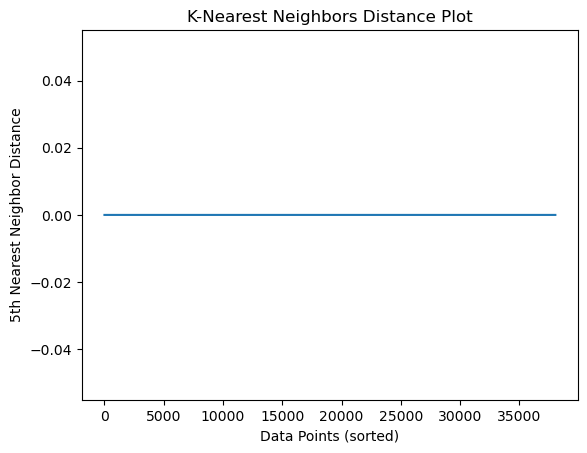

In [327]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Fit nearest neighbors
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(clustering_data_scaled)
distances, indices = neighbors_fit.kneighbors(clustering_data_scaled)

# Sort distances to find the elbow point
distances = np.sort(distances[:, -1])  # Select the 5th nearest distance
plt.plot(distances)
plt.title("K-Nearest Neighbors Distance Plot")
plt.xlabel("Data Points (sorted)")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

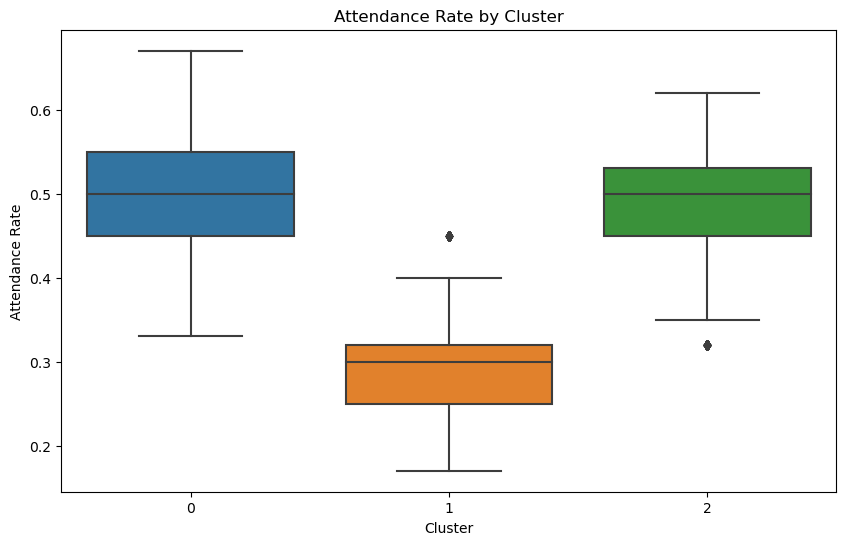

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for attendance rate by cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x=clustering_data['cluster'], y=clustering_data['attendance_rate'])
plt.title("Attendance Rate by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Attendance Rate")
plt.show()


In [336]:
anomalies_cluster_1 = clustering_data[clustering_data['cluster'] == 1]
print(anomalies_cluster_1[['school_id', 'attendance_rate', 'meal_wastage', 'calories_per_meal']].head())


       school_id  attendance_rate  meal_wastage  calories_per_meal
12900          2             0.25             1          43.185602
12901          2             0.25             1          43.185602
12902          2             0.25             1          43.185602
12903          2             0.25             1          43.185602
12904          2             0.25             1          43.185602


In [367]:
attendance_cleaned = pd.read_csv('attendance_cleaned.csv')
schools_cleaned = pd.read_csv('schools_cleaned.csv')
meals_cleaned = pd.read_csv('meals_cleaned.csv')
students_cleaned = pd.read_csv('students_cleaned.csv')
hygiene_cleaned = pd.read_csv('hygiene_cleaned.csv')

In [368]:
attendance_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46980 entries, 0 to 46979
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   attendance_id  46980 non-null  int64 
 1   student_id     46980 non-null  int64 
 2   school_id      46980 non-null  int64 
 3   date           46980 non-null  object
 4   status         46980 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.8+ MB


In [372]:
schools_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   school_id       3 non-null      int64 
 1   school_name     3 non-null      object
 2   location        3 non-null      object
 3   max_students    3 non-null      int64 
 4   contact_person  3 non-null      object
dtypes: int64(2), object(3)
memory usage: 252.0+ bytes


In [369]:
students_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            180 non-null    int64  
 1   school_id             180 non-null    int64  
 2   student_name          180 non-null    object 
 3   grade                 180 non-null    int64  
 4   age                   180 non-null    int64  
 5   gender                180 non-null    object 
 6   height_cm             180 non-null    float64
 7   weight_kg             180 non-null    float64
 8   parent_occupation     180 non-null    object 
 9   family_income         180 non-null    float64
 10  number_of_siblings    180 non-null    int64  
 11  academic_performance  180 non-null    object 
 12  transport_mode        180 non-null    object 
dtypes: float64(3), int64(5), object(5)
memory usage: 18.4+ KB


In [370]:
meals_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   meal_id              900 non-null    int64  
 1   school_id            900 non-null    int64  
 2   menu                 900 non-null    object 
 3   date                 900 non-null    object 
 4   meal_quality_score   900 non-null    float64
 5   remarks              900 non-null    object 
 6   preparation_time     900 non-null    int64  
 7   cooking_temperature  879 non-null    float64
 8   serving_temperature  900 non-null    float64
 9   calories             900 non-null    float64
 10  meal_wastage         900 non-null    int64  
 11  weather_conditions   900 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 84.5+ KB


In [371]:
hygiene_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   audit_id       607 non-null    int64  
 1   school_id      607 non-null    int64  
 2   date           607 non-null    object 
 3   auditor_name   607 non-null    object 
 4   hygiene_score  607 non-null    float64
 5   remarks        607 non-null    object 
dtypes: float64(1), int64(2), object(3)
memory usage: 28.6+ KB
